In [1]:
import numpy as np
import skimage as sk
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy as sp
import sklearn.preprocessing
from skimage import transform
from scipy.io import wavfile

# matplotlib.rcParams['figure.figsize'] = (30.0, 30.0)
# plt.rcParams["figure.figsize"] = (20,20)
%matplotlib inline

path = '/home/tracek/Projects/birdman/STHELENA-02_20140605_200000_1_16knorm.wav'
path2 = '/home/tracek/Projects/birdman/STHELENA-02_20140605_200000_1.wav'
rate, sample = wavfile.read(path)
sample = sample[0:20*rate]
rate2, sample2 = wavfile.read(path2)
sample2 = sample2[0:20*rate2]
sample2 = (sample2[:,0] + sample2[:,1]) / 2

In [2]:
window_size = 2 ** 10
overlap = window_size // 8
window = sig.tukey(M=window_size, alpha=0.25)

In [3]:
freq, time, spectrogram = sig.spectrogram(sample, fs=rate, window=window,
                                          nperseg=window_size, scaling='density', noverlap=overlap)

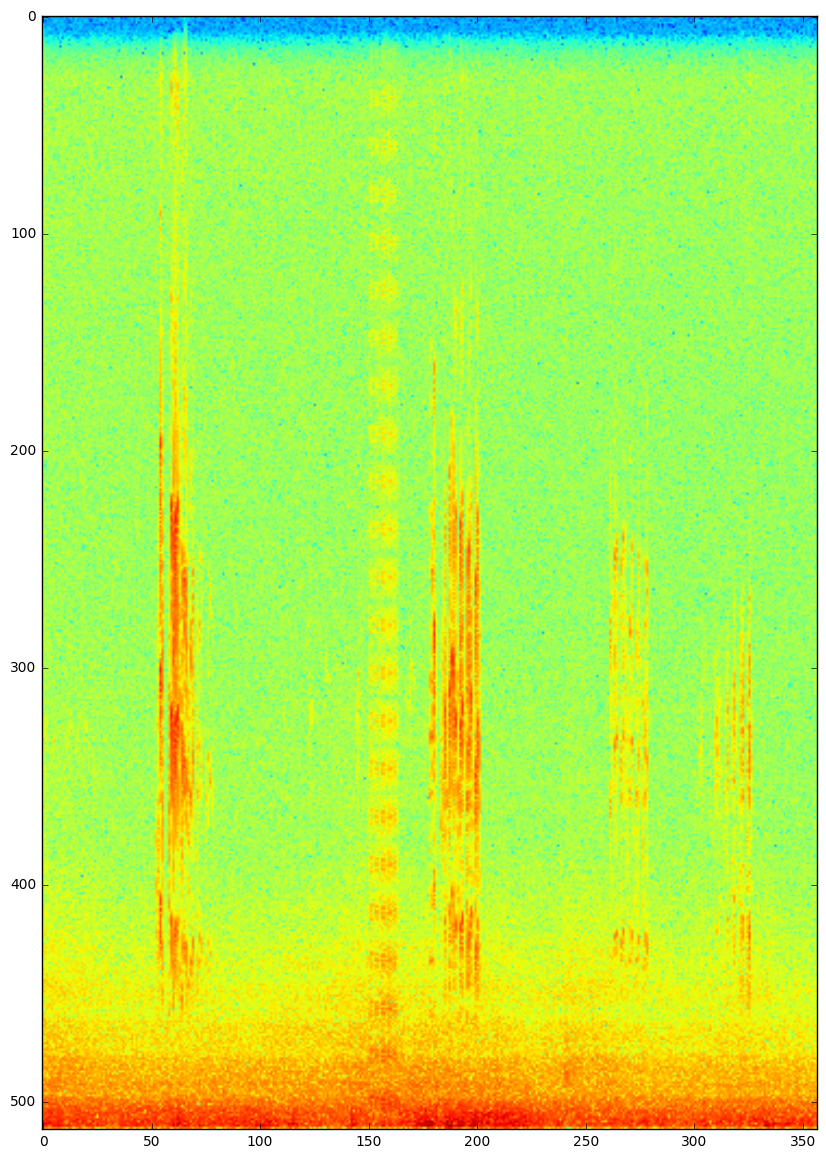

In [14]:
plt.figure(figsize=(10, 18))
plt.imshow(np.flipud(np.log10(spectrogram)))

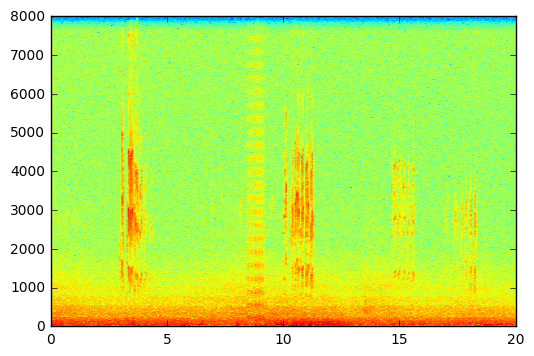

In [15]:
spectrum, freqs, t, im = plt.specgram(sample, NFFT=window_size, Fs=rate, window=window, noverlap=overlap)

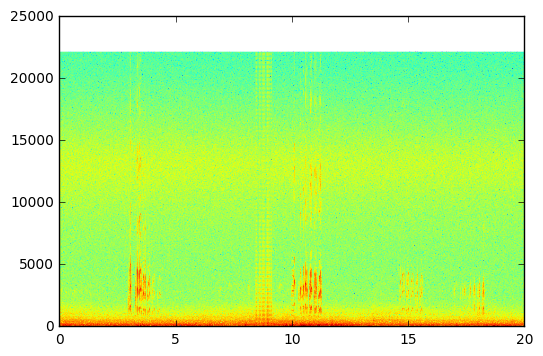

In [6]:
spectrum, freqs, t, im = plt.specgram(sample2, NFFT=window_size, Fs=rate2, window=window, noverlap=overlap)

In [ ]:
freq, time, spectrogram = sig.spectrogram(sample, fs=rate, window=window, nperseg=window_size, scaling='density')
spectrogram = np.flipud(spectrogram)
spectrogram = np.log10(spectrogram)
spec_padded = np.pad(spectrogram, ((0,0),(0, 512-spectrogram.shape[1])), mode='median')[:512,:]

In [ ]:
x = oskmeans.normalise_and_whiten(spec_padded)

In [ ]:
plt.imshow(x[0]['proj'])

In [ ]:
plt.imshow(x)

In [ ]:
plt.imsave('padded.png', spec_padded)

In [ ]:
spec_padded_ds = transform.downscale_local_mean(spec_padded, (2,2))

In [ ]:
plt.imshow(spec_padded_ds)

In [ ]:
w = spectralwhitening2(sample, rate)

In [ ]:
spectrum, freqs, t, im = plt.specgram(w, NFFT=window_size, Fs=rate, window=window, noverlap=overlap)

In [ ]:
gauss = sp.ndimage.gaussian_filter(spectrum, sigma=3)
plt.imshow(np.log10(gauss))

In [ ]:
plt.imsave('gauss.png', gauss)

In [ ]:
thresholded = gauss > np.percentile(gauss, 90)
plt.imshow(thresholded)

In [ ]:
plt.imshow(spectrum)